## Metode de aproximare a soluțiilor ecuațiilor neliniare

1. Să se găsească o aproximare a valorii $\sqrt{5}$ cu o precizie de 7 zecimale.

_Rezolvare:_ &nbsp; Definim o funcție $f$, $f : [a, b] ->$ ${\rm I\!R}$, $f$ continuă și $f(a) \cdot f(b) < 0$, astfel încât una dintre rădăcini este egală cu $\sqrt{5}$. Prin urmare, când se va aplica una dintre metodele de aproximare a soluțiilor ecuațiilor neliniare se va găsi rădăcina precizată. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Fie $f : [1, 5] -> {\rm I\!R}$, $f(x) = x^2 - 5$. Soluția ecuației $f(x) = 0$ este $x = \sqrt{5}$. Pentru a găsi soluția $x = \sqrt{5}$ vom aplica Metoda Newton-Raphson. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$f \in C^2([1, 5])$ $f'$, $f''$ nu se anulează pe $[1, 5]$ , $f(1) \cdot f(5) < 0$, pentru $x_0 = 3$ are loc condiția $f(x_0) \cdot f''(x_0) > 0$, prin urmare, conform Teoremei de Convergență,  $f(x)=0$ are o soluție unică $x^* \in (1,5)$, iar șirul $(x_k)_{k\geq0}$ construit prin Metoda Newton-Raphson, rămâne în $[1, 5]$ și converge pătratic la $x^*$. <br>

In [63]:
from math import e

def metoda_newton_raphson(f, f_derivat, a, b, x0, epsilon = 1e-5):
    x_prev = x0
    x = x0 - f(x0) / f_derivat(x0)

    num_iterations = 0
    while (abs(x - x_prev) / abs(x_prev)) >= epsilon:
        x_prev = x
        x = x_prev - f(x_prev) / f_derivat(x_prev)
        num_iterations += 1

    return x, num_iterations

f = lambda x: x**2 - 5
f_derivat = lambda x: 2 * x
numar_iteratii = 0

a, b = .1, 5.
x0 = 3.
epsilon = 1e-7
val1, numar_iteratii = metoda_newton_raphson(f, f_derivat, a, b, x0, epsilon)
print('Aproximarea valorii sqrt(5) cu Metoda Newton-Rhapson este {:.14f} efectuand {} iteratii'.format(val1, numar_iteratii))


Aproximarea valorii sqrt(5) cu Metoda Newton-Rhapson este 2.23606797749979 efectuand 4 iteratii


<br>2. Rezolvați numeric ecuația $e^{x−2} = \cos(e^{x−2}) + 1$. Să se ilustreze grafic cele două funcții și punctul lor de intersecție.

_Rezolvare:_ &nbsp; Problema se reduce la a găsi soluția ecuației $e^{x - 2} - \cos(e^{x - 2}) - 1 = 0$, care este punctul de intersecție a graficelor funcțiilor $f : {\rm I\!R} -> {\rm I\!R}, f(x) = e^{x−2}$ și $g : {\rm I\!R} -> [-1, 1], g(x) = \cos(e^{x−2}) + 1$.

Punctul de intersectie:  2.249535201085668


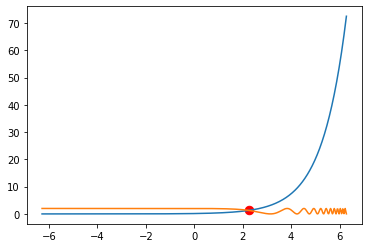

In [1]:
from math import cos, sin, exp, pi, e
import matplotlib.pyplot as plt
import numpy as np


def metoda_bisectiei(f, a, b, epsilon = 1e-5):
    assert f(a) * f(b) < 0, "E posibil sa nu existe solutii" 

    # Pasul 1: Calculam prima estimare, x0 si numarul necesar de iteratii
    x_num = (a + b) / 2 # aproximarea solutiei x* a functiei f
    num_iterations = floor(log2((b - a) / epsilon) - 1) # criteriul de oprire

    """ 
      Pasul 2: La fiecare iteratie i se va injumatati intervalul notat prin [Ai-1, Bi-1] si se va selecta noul
      interval [Ai, Bi] in care se afla x*, unde x* verifica ecuatia f(x*) = 0.
    """
    num_iter = 0
    for i in range(1, num_iterations):
        num_iter = i
        if f(x_num) == 0:
            break
        elif f(a) * f(x_num) < 0:
            b = x_num
        else:
            a = x_num

        x_num = (a - b) / 2
    
    return x_num, num_iter



def metoda_secantei(f, a, b, x0, x1, epsilon = 1e-5):
    x_prev1, x_prev2 = x0, x1
    x = (x_prev2 * f(x_prev1) - x_prev1 * f(x_prev2)) / (f(x_prev1) - f(x_prev2))

    num_iterations = 0
    while (abs(x - x_prev1) / abs(x - x_prev2)) >= epsilon:
        num_iterations += 1
        x_prev2 = x_prev1
        x_prev1 = x
        x = (x_prev2 * f(x_prev1) - x_prev1 * f(x_prev2)) / (f(x_prev1) - f(x_prev2))

        if x < a:
            print("Introduceti alte valori pentru x0, x1")
            break
        if x > b:
            print( "Introduceti alte valori pentru x0, x1")
            break

    return x, num_iterations

f = lambda x: exp(x - 2) - cos(exp(x - 2)) - 1
g = lambda x: e ** (x - 2)
h = lambda x: cos(e ** (x - 2)) + 1
h = np.vectorize(h)

a, b = 1.5, 2.5
x0, x1 = 1.8, 2.1
x_coordinate, num_iter = metoda_secantei(f, a, b, x0, x1, 1e-7)
y_coordinate = g(x_coordinate)
print("Punctul de intersectie: ", x_coordinate)


axis_Ox  = np.linspace(-2 * pi, 2 * pi, 500)
axis_Oy1 = g(axis_Ox)
axis_Oy2 = h(axis_Ox)

plt.figure(0)
plt.plot(axis_Ox, axis_Oy1)
plt.plot(axis_Ox, axis_Oy2)
plt.scatter(x_coordinate, y_coordinate, c="red", s=72, alpha=1)
plt.show()

<br> 3. _Rezolvare:_ &nbsp; Pentru alegerea celor trei subintervale, astfel încât metoda secantei să fie convergentă, 
        mai întâi calculăm punctele de minim și de maxim(i.e punctele în care derivata se anulează) și cele de inflexiune. În cazul nostru, $f'=3x^2 + 6x - 10$, iar soluțiile ecuației $3x^2 + 6x - 10 = 0$ sunt $x_{1,2} = \frac{(-6 \pm \sqrt(156))}{6}$, de unde rezultă că $x_{1,2}$ sunt punctele în care derivata de ordinul I se anulează. $f'' = 6x + 6$, iar soluția ecuației $6x + 6 = 0$ este $x_3 = -1$, de unde rezultă că punctul în care derivata de ordinul II se anulează este $x_3 = -1$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
        Cele trei subintervale de forma $[a,b]$ au fost alese astfel încât să respecte ipoteza Teoremei de Convergență a Metodei Poziției False: $f(a) \cdot f(b) < 0$ și $f'$, $f''$ nu se anuleaza pe $[a, b]$.

Solutiile ecuatiei sunt:  -4.999995951115848 0.0 1.9999895478495098


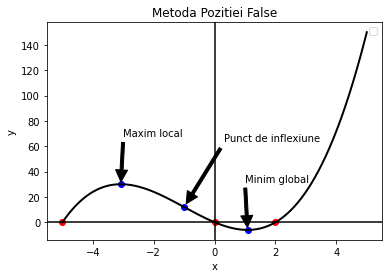

In [65]:
from math import e, sqrt
import matplotlib.pyplot as plt
import numpy as np


def metoda_pozitiei_false(f, a, b, x0, epsilon = 1e-5):
    x_prev = x0
    x = (a * f(b) - b * f(a)) / (f(b) - f(a))

    num_iterations = 0
    while (abs(x - x_prev) / abs(x_prev)) >= epsilon:
        num_iterations += 1
        if f(x) == 0:
            break
        elif f(a) * f(x) < 0:
            b = x
        else:
            a = x

        x_prev = x
        x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    
    return x, num_iterations



f = lambda x: x**3 + 3 * x**2 - 10 * x

a, b = -5.5, (-6 - 156**(1/2)) / 6 - 0.5
x0 = -4.
x_num1, num_iter = metoda_pozitiei_false(f, a, b, x0)

a, b = -.9, (-6 + 156**(1/2)) / 6 - 0.2
x0 = -.8
x_num2, num_iter = metoda_pozitiei_false(f, a, b, x0)

a, b = (-6 + 156**(1/2)) / 6 + 0.28, 3.2
x0 = 3.
x_num3, num_iter = metoda_pozitiei_false(f, a, b, x0)

print('Solutiile ecuatiei sunt: ', x_num1, x_num2, x_num3)

axis_Ox = np.linspace(-5., 5., num=1000)
axis_Oy = f(axis_Ox)

x_coordinates = [x_num1, x_num2, x_num3]
y_coordinates = [f(x_num1), f(x_num2), f(x_num3)]

plt.figure(0)
plt.title('Metoda Pozitiei False')
plt.legend(['f(x)', 'x_num'])

# Plotam punctele de inflexiune, de minim global si maxim local
plt.annotate('Punct de inflexiune', xy=(-1, 12), xytext=(0.3, 64),
         arrowprops=dict(width=3, facecolor='black', shrink=0.05),
         )
plt.scatter(-1, 12, c="blue", alpha=1)

x1, y1 = (-6 - sqrt(156)) / 6, f((-6 - sqrt(156)) / 6)
plt.annotate('Maxim local', xy=(x1, y1), xytext=(-3, 68),
         arrowprops=dict(width=3, facecolor='black', shrink=0.05),
         )
plt.scatter(x1, y1, c="blue", alpha=1)

x2, y2 = (-6 + sqrt(156)) / 6, f((-6 + sqrt(156)) / 6)
plt.annotate('Minim global', xy=(x2, y2), xytext=(1, 32),
         arrowprops=dict(width=3, facecolor='black', shrink=0.05),
         )
plt.scatter(x2, y2, c="blue", alpha=1)


plt.axvline(0, c='black')
plt.axhline(0, c='black')

plt.xlabel('x') 
plt.ylabel('y')

plt.plot(axis_Ox, axis_Oy, c="black", linestyle="-", linewidth=2)
plt.scatter(x_coordinates, y_coordinates, c="red", alpha=1)
plt.show()

<br> 4. _Rezolvare:_ &nbsp; Fie $f : [-6, 3] ->{\rm I\!R}, f(x) = x^3 - 7x + 6$. Avem că $f \in C'([-6,3])$, $f(a)\cdot f(b) < 0$ și $f'(x) \neq 0$, $\forall x \in [-6, 3]$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Pentru alegerea celor trei subintervale, astfel încat Metoda Secantei să fie convergentă, mai întâi calculăm punctele de minim și de maxim(i.e punctele în care derivata se anulează). În cazul nostru, derivata de ordinul I este $3x^2-7$ iar punctele în care derivata se anulează sunt $x_{1,2} = \pm\sqrt(\frac{7}{3})$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
        Intervalele alese sunt $[-4, -\sqrt(\frac{7}{3}) - 0.1]$, $[-\sqrt(\frac{7}{3}) + 0.1, \sqrt(\frac{7}{3}) - 0.1]$, $[\sqrt(\frac{7}{3}) + 0.1, 3]$.

Solutiile ecuatiei sunt:  -3.0 1.0 2.0


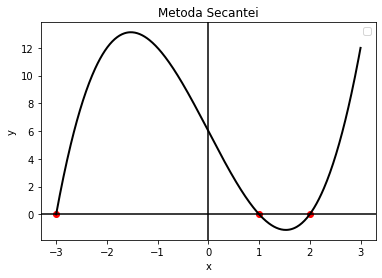

In [66]:
from math import e
import matplotlib.pyplot as plt
import numpy as np


def metoda_secantei(f, a, b, x0, x1, epsilon = 1e-5):
    x_prev1, x_prev2 = x0, x1
    x = (x_prev2 * f(x_prev1) - x_prev1 * f(x_prev2)) / (f(x_prev1) - f(x_prev2))

    num_iterations = 0
    while (abs(x - x_prev1) / abs(x - x_prev2)) >= epsilon:
        num_iterations += 1
        x_prev2 = x_prev1
        x_prev1 = x
        x = (x_prev2 * f(x_prev1) - x_prev1 * f(x_prev2)) / (f(x_prev1) - f(x_prev2))

        if x < a:
            print("Introduceti alte valori pentru x0, x1")
            break
        if x > b:
            print( "Introduceti alte valori pentru x0, x1")
            break

    return x, num_iterations



f = lambda x: x**3 - 7 * x + 6

a, b = -5, -(7/3)**(1/2) - 0.1
x0, x1 = -3.5, -2.5
x_num1, num_iter1 = metoda_secantei(f, a, b, x0, x1)
# print('x1:', x_num1, '\n', 'Numar iteratii: ',  num_iter, '\n')

a, b = -(7/3)**(1/2) + 0.1, (7/3)**(1/2) - 0.1
x0, x1 = -0.75, 0.75
x_num2, num_iter2 = metoda_secantei(f, a, b, x0, x1)
# print('x2:', x_num2, '\n', 'Numar iteratii: ',  num_iter, '\n')

a, b = (7/3)**(1/2) + 0.1, 3
x0, x1 = 1.6, 2.6
x_num3, num_iter3 = metoda_secantei(f, a, b, x0, x1)
# print('x3:', x_num3, '\n', 'Numar iteratii:',  num_iter, '\n')
print('Solutiile ecuatiei sunt: ', x_num1, x_num2, x_num3)

axis_Ox = np.linspace(-3., 3., num=500)
axis_Oy = f(axis_Ox)

x_coordinates = [x_num1, x_num2, x_num3]
y_coordinates = [f(x_num1), f(x_num2), f(x_num3)]

plt.figure(0)
plt.title('Metoda Secantei')
plt.legend(['f(x)', 'x_num'])

plt.axvline(0, c='black')
plt.axhline(0, c='black')

plt.xlabel('x') 
plt.ylabel('y')

plt.plot(axis_Ox, axis_Oy, c="black", linestyle="-", linewidth=2)
plt.scatter(x_coordinates, y_coordinates, c="red", alpha=1)
plt.show()